# Exploratory Data Analysis(EDA) Workshop
## Women Who Code Python Track
### Wednesday, December 11th, 2019



# Project Outline:
[1. Import Libraries/Set Preferences](#1.-Import-Libraries/Set-Preferences)

[2. Set Up Your Working directory](#2.-Set-Up-Your-Working-directory)

[3. Load Your Data In!](#3.-Load-Your-Data-In!)

[4. Quick Peek at What Your Data Looks Like](#4.-Quick-Peek-at-What-Your-Data-Looks-Like)

[5. Dealing With Missing Values](#5.-Dealing-With-Missing-Values)

[6. Convert Data Types](#6.-Convert-Data-Types)

[7. Feature Distribution](#7.-Feature-Distribution)

[8. Normalize Data/Deal With Outliers](#8.-Normalize-Data/Deal-With-Outliers)

[9. Feature Engineering and Selection](#9.-Feature-Engineering-and-Selection)

[10. Bivariate Analysis](#10.-Bivariate-Analysis)

[11. Relationships in Your Data](#11.-Relationships-in-Your-Data)

## 1. Import Libraries/Set Preferences
[Return to Outline](#Project-Outline:)

In [308]:
# Let's import the basic libraries that we ALWAYS use in data science
# NOTE: you don't have to use the same nicknames for packages that I do, but I find that these are pretty popular
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [309]:
# Any other package or library you need to use outside of the basics can go here!

In [310]:
# Here is a great place to set your preferences for these tools
sns.set(style= 'whitegrid', font_scale = 1.5)
pd.set_option("display.max_rows", 999)

## 2. Set Up Your Working directory
[Return to Outline](#Project-Outline:)

In [311]:
# What directory are we currently in on this computer?
os.getcwd()

'F:\\Data\\Datasets'

In [312]:
# Let's change to where our dataset is located
os.chdir('F:\\Data\\Datasets')

In [313]:
# Did it work? Are we now working in the same directory that our dataset is in?
os.getcwd()

'F:\\Data\\Datasets'

## 3. Load Your Data In!
[Return to Outline](#Project-Outline:)

In [314]:
# Reading the CSV of our dataset in 
titanic_df = pd.read_csv('titanic training dataset.csv')

In [315]:
# What does our data look like at import?
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 4. Quick Peek at What Your Data Looks Like
[Return to Outline](#Project-Outline:)

In this section we will take a closer look at our dataset in different ways, such as the basics (column names, cleaning column names as needed, datatypes for each feature, 

In [316]:
# What columns does our data have?
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

After looking at our column names we see that they start with capital letters, which can make it a bit difficult for us later on. Let's go ahead and make all of our column names lowercase for easier use.

In [317]:
titanic_df.columns = titanic_df.columns.str.lower()

In [318]:
# Let's also make some of our column names easier to understand using our data dictionary!
titanic_df.rename(columns = {'sibsp':'#_siblings_or_spouses_onboard', 'parch':'#_of_family_members_onboard', 'cabin':'cabin_#',
                            'embarked':'port_of_embarkation'}, inplace = True)

In [319]:
# Double checking that our names are lowercase and edited
titanic_df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age',
       '#_siblings_or_spouses_onboard', '#_of_family_members_onboard',
       'ticket', 'fare', 'cabin_#', 'port_of_embarkation'],
      dtype='object')

In [320]:
# Let's take a quick look at some basic info for our dataset like data types, number of columns, and memory usage.
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
passengerid                      891 non-null int64
survived                         891 non-null int64
pclass                           891 non-null int64
name                             891 non-null object
sex                              891 non-null object
age                              714 non-null float64
#_siblings_or_spouses_onboard    891 non-null int64
#_of_family_members_onboard      891 non-null int64
ticket                           891 non-null object
fare                             891 non-null float64
cabin_#                          204 non-null object
port_of_embarkation              889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [321]:
# Using  .describe() to learn a bit more about the descriptive statistics for our data
titanic_df.describe()

,passengerid,survived,pclass,age,#_siblings_or_spouses_onboard,#_of_family_members_onboard,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [322]:
# What do the first 10 rows of our data look like?
titanic_df.head(10)

,passengerid,survived,pclass,name,sex,age,#_siblings_or_spouses_onboard,#_of_family_members_onboard,ticket,fare,cabin_#,port_of_embarkation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [323]:
# Do we have any null/missing values?
titanic_df.isnull().sum().sort_values(ascending = False)

cabin_#                          687
age                              177
port_of_embarkation                2
fare                               0
ticket                             0
#_of_family_members_onboard        0
#_siblings_or_spouses_onboard      0
sex                                0
name                               0
pclass                             0
survived                           0
passengerid                        0
dtype: int64

## 5. Dealing With Missing Values
[Return to Outline](#Project-Outline:)

Since we can see above that we have three features(columns) that are missing values let's take a closer look at them and figure out the best way to deal with them!

In [324]:
# Let's look at our two missing "embarked" values first.
titanic_df.loc[titanic_df['port_of_embarkation'].isnull()]

,passengerid,survived,pclass,name,sex,age,#_siblings_or_spouses_onboard,#_of_family_members_onboard,ticket,fare,cabin_#,port_of_embarkation
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Since we only have two missing values let's not totally throw these rows out yet. We can do a bit more digging in our data to see if we can find out more info about these two passangers. One weird note: they have the same ticket number! Let's see if any other passangers have the same ticket as well.

In [325]:
# Looking for other people with the same ticket number
titanic_df.loc[titanic_df['ticket'] == "113572"]

,passengerid,survived,pclass,name,sex,age,#_siblings_or_spouses_onboard,#_of_family_members_onboard,ticket,fare,cabin_#,port_of_embarkation
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Hmm... since these two are the only people without a port of embarkation let's just drop them from our dataset!

In [326]:
titanic_df.dropna(subset = ['port_of_embarkation'], inplace = True)

In [327]:
# What other values are we missing?
titanic_df.isnull().sum().sort_values(ascending = False)

cabin_#                          687
age                              177
port_of_embarkation                0
fare                               0
ticket                             0
#_of_family_members_onboard        0
#_siblings_or_spouses_onboard      0
sex                                0
name                               0
pclass                             0
survived                           0
passengerid                        0
dtype: int64

Next, let's deal with our missing cabin numbers! I have a huntch that cabin numbers will only relate to passengers of a specific class- so let's dig deeper!

In [328]:
# What rows are missing cabin number info?
no_cabin = titanic_df.loc[titanic_df['cabin_#'].isnull()]
no_cabin.head()

,passengerid,survived,pclass,name,sex,age,#_siblings_or_spouses_onboard,#_of_family_members_onboard,ticket,fare,cabin_#,port_of_embarkation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [329]:
# Let's see what the distribution of passenger class is like for these people!
no_cabin['pclass'].value_counts()

3    479
2    168
1     40
Name: pclass, dtype: int64

Interesting! It seems that the majority of our missing cabin numbers seem to be passengers who are in pclass 3 (a.k.a. those of lower socioeconomic status). We can be pretty sure, based on prior knowledge of economic status at the time and some background research, that these individuals most likely didn't ride in a cabin and therefore we can assign them a cabin number of 0!

It is important to take a minute here and decide just how important knowing our cabin number is right now. For this moment cabin number is pretty irrelevant, since we seem to care more about passenger class in relation to survived. Let's leave these blank as well for the moment and we can come back and attempt to identify cabin number later if it is relevant to the type of model we want to do!

In [330]:
# Double checking that there isn't already a cabin number of 0
titanic_df['cabin_#'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'C83', 'F33', 'F G73',
       'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69',
       'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32',
       'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87',
       'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49',
       'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66',
       'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24',

In [331]:
# Let's break our "no cabin number" groups up into pclass and take a closer look.
lower = no_cabin.loc[no_cabin['pclass'] == 3]
middle = no_cabin.loc[no_cabin['pclass'] == 2]
higher = no_cabin.loc[no_cabin['pclass'] == 1]

In [332]:
# What do our lower pclass passengers without a cabin number look like?
lower.describe()

,passengerid,survived,pclass,age,#_siblings_or_spouses_onboard,#_of_family_members_onboard,fare
count,479.000000,479.000000,479.0,345.000000,479.000000,479.000000,479.000000
mean,439.158664,0.235908,3.0,25.260638,0.624217,0.386221,13.725077
std,263.774231,0.425009,0.0,12.474318,1.389108,0.893431,11.899245
min,1.000000,0.000000,3.0,0.420000,0.000000,0.000000,0.000000
25%,200.000000,0.000000,3.0,18.000000,0.000000,0.000000,7.750000
50%,434.000000,0.000000,3.0,24.000000,0.000000,0.000000,8.050000
75%,663.000000,0.000000,3.0,32.000000,1.000000,0.000000,15.500000
max,891.000000,1.000000,3.0,74.000000,8.000000,6.000000,69.550000


In [333]:
# What do our middle pclass passengers without a cabin number look like?
middle.describe()

,passengerid,survived,pclass,age,#_siblings_or_spouses_onboard,#_of_family_members_onboard,fare
count,168.000000,168.000000,168.0,158.000000,168.000000,168.000000,168.000000
mean,455.970238,0.440476,2.0,30.315380,0.404762,0.380952,20.909673
std,251.418239,0.497928,0.0,13.753416,0.591741,0.699097,13.701631
min,10.000000,0.000000,2.0,0.670000,0.000000,0.000000,0.000000
25%,237.750000,0.000000,2.0,23.000000,0.000000,0.000000,13.000000
50%,442.500000,0.000000,2.0,29.000000,0.000000,0.000000,15.022900
75%,673.250000,1.000000,2.0,37.750000,1.000000,1.000000,26.000000
max,887.000000,1.000000,2.0,70.000000,3.000000,3.000000,73.500000


In [334]:
# What do our higher pclass passengers without a cabin number look like?
higher.describe()

,passengerid,survived,pclass,age,#_siblings_or_spouses_onboard,#_of_family_members_onboard,fare
count,40.000000,40.000000,40.0,26.000000,40.000000,40.000000,40.000000
mean,438.100000,0.475000,1.0,41.230769,0.225000,0.050000,76.848643
std,239.875374,0.505736,0.0,13.752986,0.479717,0.220721,90.127232
min,31.000000,0.000000,1.0,22.000000,0.000000,0.000000,0.000000
25%,268.000000,0.000000,1.0,30.000000,0.000000,0.000000,26.550000
50%,458.000000,0.000000,1.0,39.000000,0.000000,0.000000,44.750000
75%,605.750000,1.000000,1.0,50.750000,0.000000,0.000000,88.234350
max,857.000000,1.000000,1.0,71.000000,2.000000,1.000000,512.329200


Since we are currently keeping these missing values as they are let's go ahead and move on to those passengers missing ages!

In [335]:
# Who is missing an age in our dataset?
missing_age = titanic_df.loc[titanic_df['age'].isnull()]
missing_age.head()

,passengerid,survived,pclass,name,sex,age,#_siblings_or_spouses_onboard,#_of_family_members_onboard,ticket,fare,cabin_#,port_of_embarkation
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [336]:
# Let's take a closer look at the details for this subset of passengers
missing_age.describe()

,passengerid,survived,pclass,age,#_siblings_or_spouses_onboard,#_of_family_members_onboard,fare
count,177.000000,177.000000,177.000000,0.0,177.000000,177.000000,177.000000
mean,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567
std,250.552901,0.456787,0.763216,NaN,1.626316,0.534145,31.874608
min,6.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000
25%,230.000000,0.000000,3.000000,NaN,0.000000,0.000000,7.750000
50%,452.000000,0.000000,3.000000,NaN,0.000000,0.000000,8.050000
75%,634.000000,1.000000,3.000000,NaN,0.000000,0.000000,24.150000
max,889.000000,1.000000,3.000000,NaN,8.000000,2.000000,227.525000


In [337]:
# How many of these passengers survived?
missing_age['survived'].value_counts()

0    125
1     52
Name: survived, dtype: int64

This is an important pausing point! We can see that the majority of our passengers with missing ages didn't survive (125 our of 177). We have a few options here. We can:
- ignore the mising values (eh, not my first choice since age is something I feel strongly correlates with survival)
- drop those missing ages (this is 177 passengers out of 891 or about 20% of our total passengers so I'm not too happy with loosing that much data)
- dividing the missing-age passengers into survived or not survived/pclass and assigning them the average age of the group they belong to


For me, the third option of assigning these people the mean age of their survival group/pclass is the best to me! Let's go ahead and do that now!

In [338]:
# What does the distribution of pclasses look like in our missing ages?
missing_age['pclass'].value_counts()

3    136
1     30
2     11
Name: pclass, dtype: int64

In [339]:
# Sorting our dataset by survived or not and giving the passengers with the missing ages the average for their survival group!
titanic_df['age'].fillna(titanic_df.groupby('survived')['age'].transform("mean"), inplace=True)
titanic_df.head()

,passengerid,survived,pclass,name,sex,age,#_siblings_or_spouses_onboard,#_of_family_members_onboard,ticket,fare,cabin_#,port_of_embarkation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [340]:
# Before we move on to the next step let's double check our null values: we shouldn't have any null ages or ports of embarkation 
# and the same original number of passengers missing a cabin number
titanic_df.isnull().sum().sort_values(ascending = False)

cabin_#                          687
port_of_embarkation                0
fare                               0
ticket                             0
#_of_family_members_onboard        0
#_siblings_or_spouses_onboard      0
age                                0
sex                                0
name                               0
pclass                             0
survived                           0
passengerid                        0
dtype: int64

SWEET! Since our double checking showed that our assumptions about our missing values were correct let's move on to our next step: dealing with data types!

## 6. Convert Data Types
[Return to Outline](#Project-Outline:)

When dealing with datasets it's helpful to pay close attention to what data types your individual features have and deal with them early to save you some pain! What data types do our features have in this dataset?

In [341]:
titanic_df.dtypes

passengerid                        int64
survived                           int64
pclass                             int64
name                              object
sex                               object
age                              float64
#_siblings_or_spouses_onboard      int64
#_of_family_members_onboard        int64
ticket                            object
fare                             float64
cabin_#                           object
port_of_embarkation               object
dtype: object

Overall, we seem to mostly have intergers, several objects, and a few floats. Floats are ICKY so let's convert them to intergers to make our lives easier!

In [342]:
# Converting age and fare to intergers
titanic_df['age'] = titanic_df['age'].astype(int)
titanic_df['fare'] = titanic_df['fare'].astype(int)

In [343]:
# Sanity check: did our conversions work?
titanic_df.dtypes

passengerid                       int64
survived                          int64
pclass                            int64
name                             object
sex                              object
age                               int32
#_siblings_or_spouses_onboard     int64
#_of_family_members_onboard       int64
ticket                           object
fare                              int32
cabin_#                          object
port_of_embarkation              object
dtype: object

HOOOOOOOORRRRRAAAYYY!! We have now gotten rid of those pesky floats and can move on with our lives!

**One quick note:** if you are dealing with any features that involve time, such as dates, months, hours, etc.. it is super important to convert those into datetimes as soon as you finish your first peek at your data (step 4)!!

## 7. Feature Distribution
[Return to Outline](#Project-Outline:)

This is one of my FAVORITE parts of EDA because we get to look at the distribution of individual features and make pretty visuals!

In [344]:
# Wait.... what feautres do we have again?
titanic_df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age',
       '#_siblings_or_spouses_onboard', '#_of_family_members_onboard',
       'ticket', 'fare', 'cabin_#', 'port_of_embarkation'],
      dtype='object')

Looking at our features(columns) above there are a few I really don't care about (passenger id, name, ticket number, and cabin number) that I'm not going to look any further into at this moment. For the remaining features I want to know more detail about what they contain and what they look like, overall!

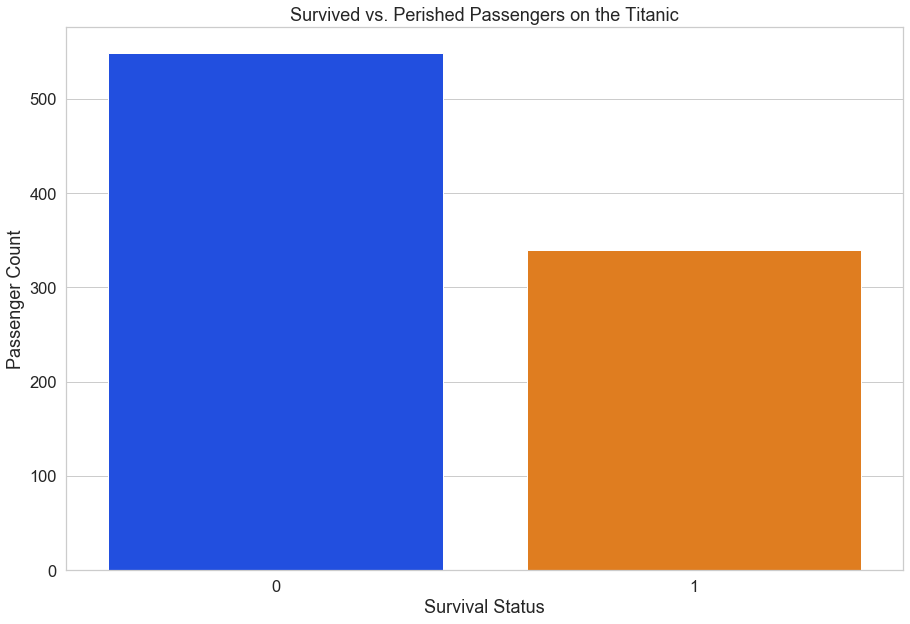

In [345]:
# What does the distriubtion of survived(1) vs. not survived passengers(0) look like visually?
plt.figure(figsize = (15,10))
sns.countplot(x= titanic_df['survived'], palette= 'bright')
plt.title('Survived vs. Perished Passengers on the Titanic')
plt.xlabel('Survival Status')
plt.ylabel('Passenger Count');

In [346]:
# What does survived vs. perished passengers look like numerically?
titanic_df['survived'].value_counts()

0    549
1    340
Name: survived, dtype: int64

Based on both our actual counts and visualization we see that the majority (549 out of 891 passengers in this dataset) died. Super sad. 

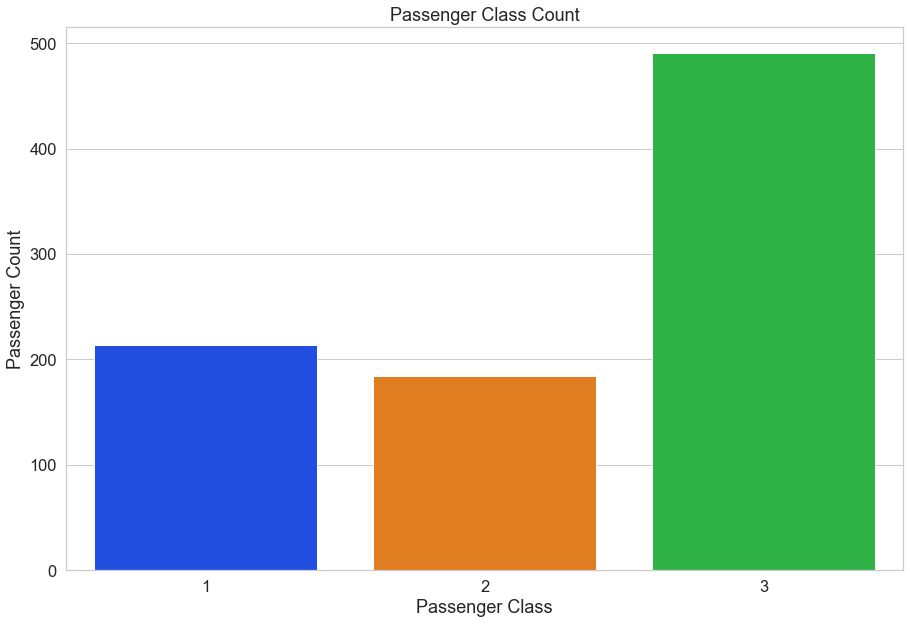

In [347]:
# What does the distribution of passenger class look like visually?
plt.figure(figsize = (15,10))
sns.countplot(x= titanic_df['pclass'], palette= 'bright')
plt.title('Passenger Class Count')
plt.xlabel('Passenger Class')
plt.ylabel('Passenger Count');

In [348]:
# What does the distribution of passenger class look like numerically?
titanic_df['pclass'].value_counts()

3    491
1    214
2    184
Name: pclass, dtype: int64

**Takeways:**
- The majority of passengers in this dataset were in 3rd class (a.k.a. low ses)
- There were more 1st class passengers than 2nd class passengers

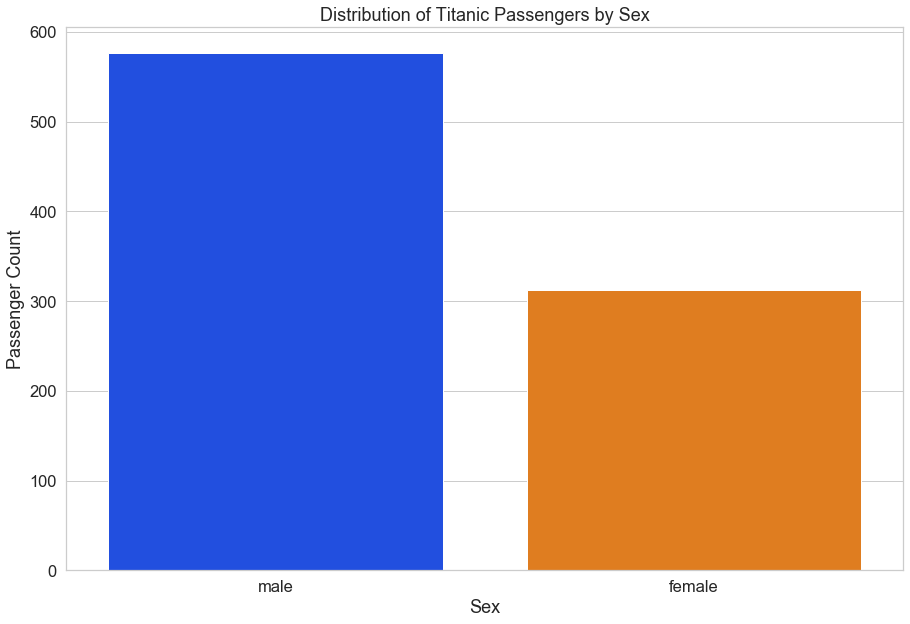

In [349]:
# What does the distribution of sex look like visually?
plt.figure(figsize = (15,10))
sns.countplot(x= titanic_df['sex'], palette= 'bright')
plt.title('Distribution of Titanic Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Passenger Count');

In [350]:
# What does the distribution of sex look like numerically?
titanic_df['sex'].value_counts()

male      577
female    312
Name: sex, dtype: int64

**Takeways:** The majority of passengers on the Titanic (in this dataset) were male.

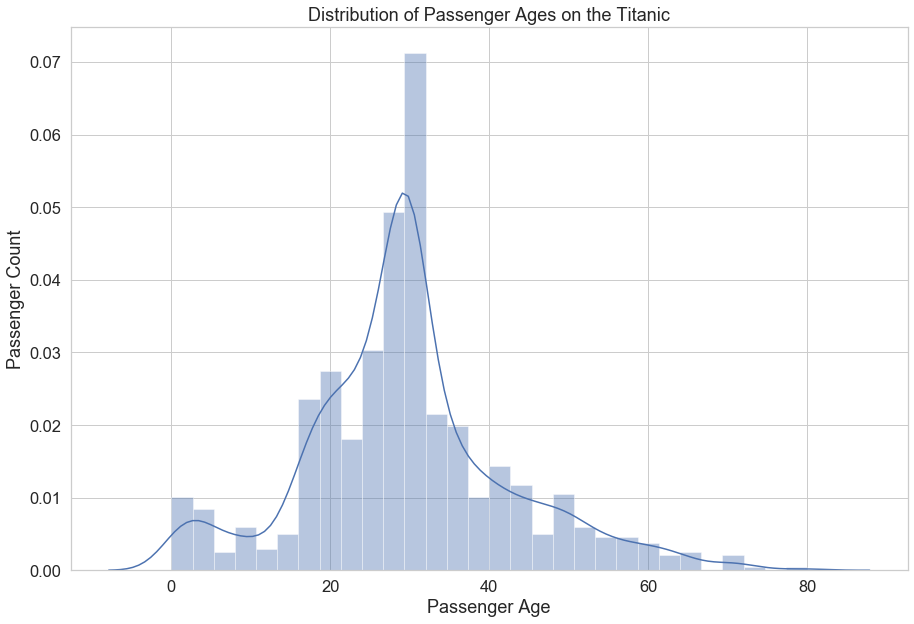

In [351]:
# What does the distribution of age look like visually?
plt.figure(figsize = (15,10))
sns.distplot(titanic_df['age'])
plt.title('Distribution of Passenger Ages on the Titanic')
plt.xlabel('Passenger Age')
plt.ylabel('Passenger Count');

In [352]:
# What does the distribution of age look like numerically? (since there are so many ages we have to make a new dataframe for counts!)
age_distro = pd.DataFrame(titanic_df['age'].value_counts())
age_distro.reset_index(inplace = True)
age_distro.rename(columns = {'index':'age', 'age':'count'}, inplace = True)
age_distro.sort_values(by = "age", inplace= True)
age_distro

,age,count
36,0,7
35,1,7
28,2,10
42,3,6
26,4,10
49,5,4
58,6,3
57,7,3
47,8,4
32,9,8


**Takeways:** Most passengers, in this dataset, were between 20 to 35 years old with the majority around 35.

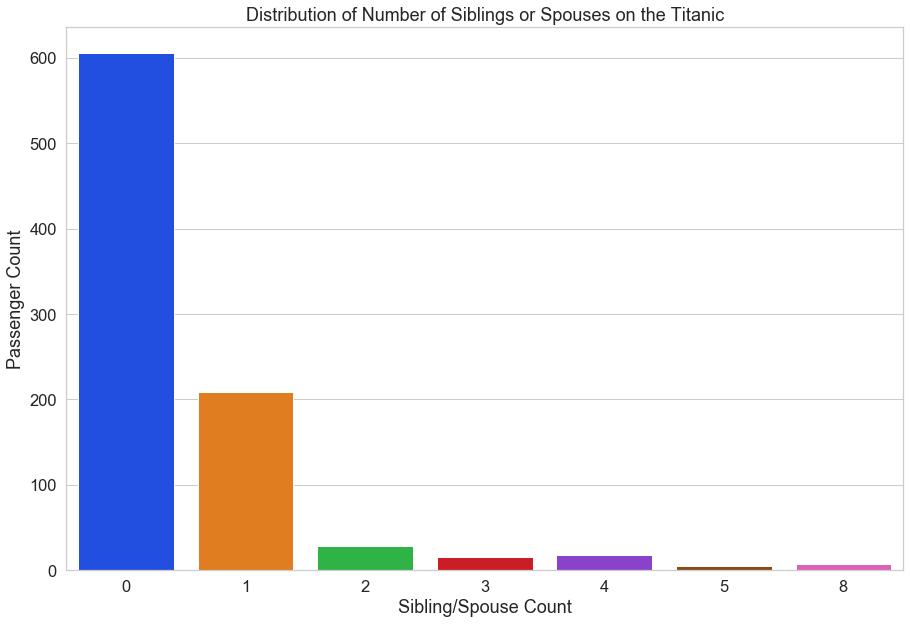

In [353]:
# What does the distribution of siblings and spouses look like visually?
plt.figure(figsize = (15,10))
sns.countplot(titanic_df['#_siblings_or_spouses_onboard'], palette= "bright")
plt.title('Distribution of Number of Siblings or Spouses on the Titanic')
plt.xlabel('Sibling/Spouse Count')
plt.ylabel('Passenger Count');

In [354]:
# What does the distribution of siblings and spouses look like numerically?
titanic_df['#_siblings_or_spouses_onboard'].value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: #_siblings_or_spouses_onboard, dtype: int64

**Takeways:**
- Most passengers didn't have any siblings or spouses with them
- The second largest majority is those with one (probably their spouse)
- Five passengers had 5 siblings onboard

This is such a weird feature that we will most likely disregard it in our feature engineering section!

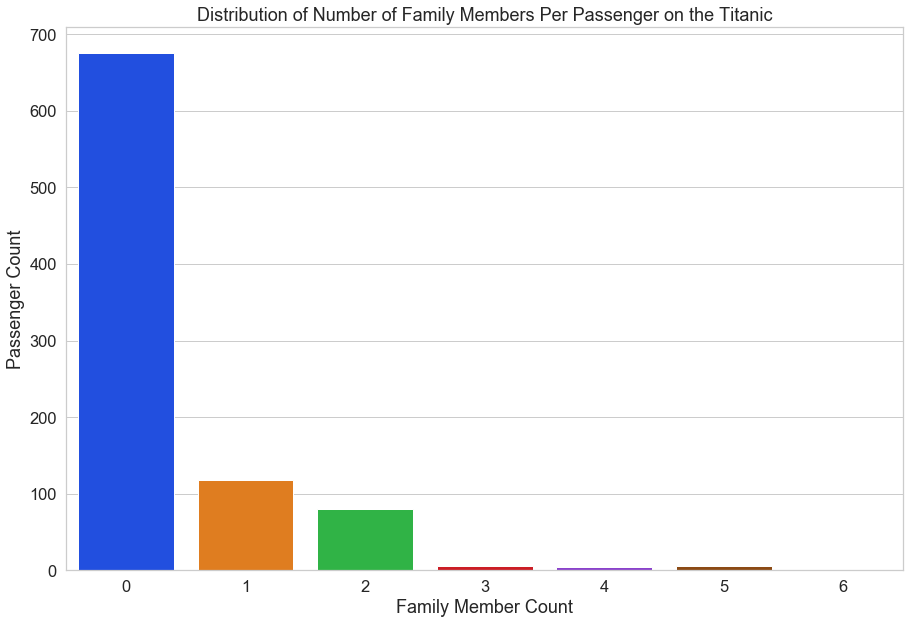

In [355]:
# What does the distribution of family members look like visually?
plt.figure(figsize = (15,10))
sns.countplot(titanic_df['#_of_family_members_onboard'], palette= "bright")
plt.title('Distribution of Number of Family Members Per Passenger on the Titanic')
plt.xlabel('Family Member Count')
plt.ylabel('Passenger Count');

In [356]:
# What does the distribution of family members look like numerically?
titanic_df['#_of_family_members_onboard'].value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: #_of_family_members_onboard, dtype: int64

**Takeways:** Most passengers were alone or had less than 2 family members aboard with them.

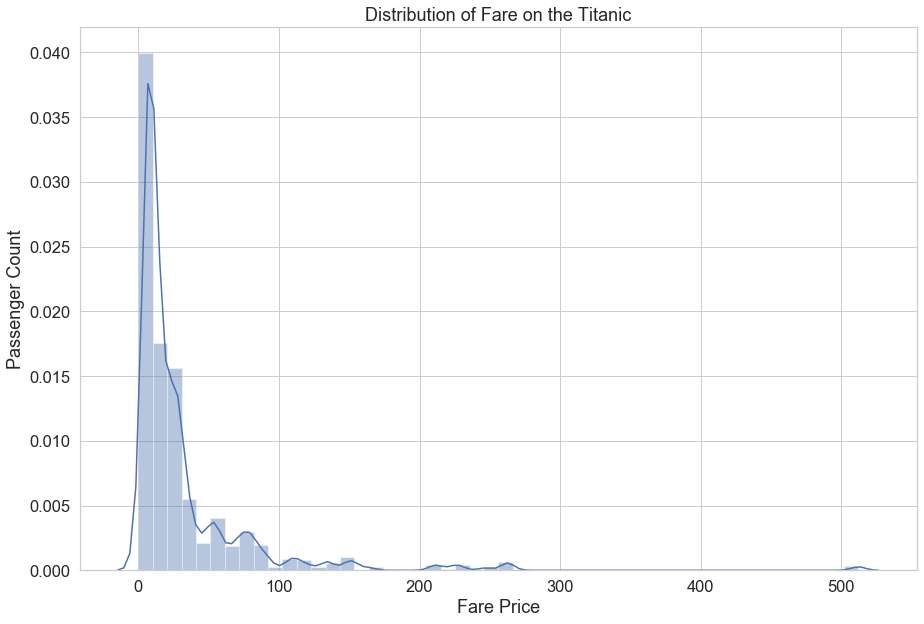

In [357]:
# What does the distribution of fare look like visually?
plt.figure(figsize = (15,10))
sns.distplot(titanic_df['fare'])
plt.title('Distribution of Fare on the Titanic')
plt.xlabel('Fare Price')
plt.ylabel('Passenger Count');

In [396]:
# What does the distribution of fare look like numerically?
titanic_df['fare'].value_counts().sort_values(ascending = False).head()

7     213
8      70
26     57
13     50
10     28
Name: fare, dtype: int64

**Takeways:**
- The majority of passengers paid less than $50 to ride on the Titanic
- This is one of the MAIN areas to focus on outliers and weird numbers when we get to that point!

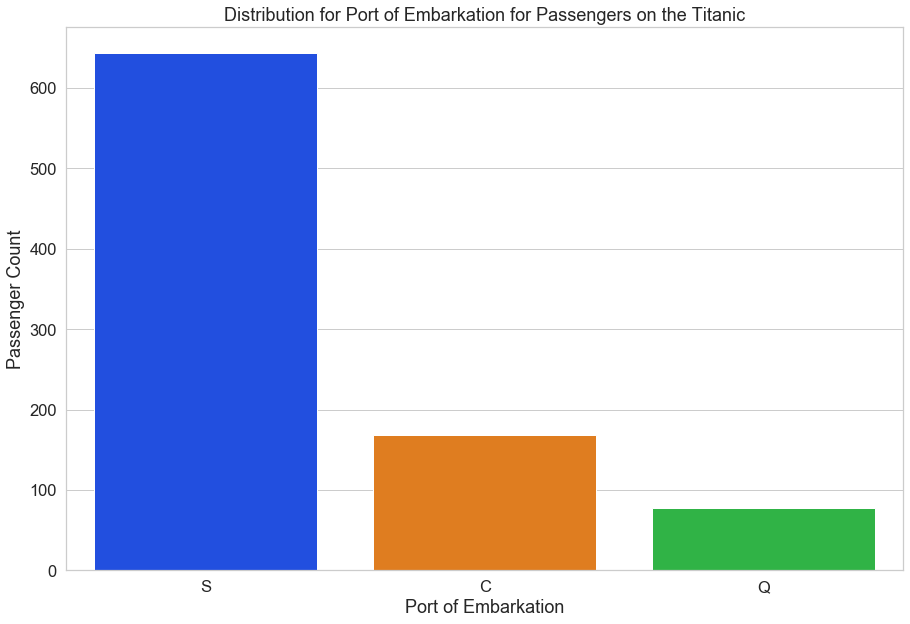

In [359]:
# What does the distribution of ports of embarkation look like visually?
plt.figure(figsize = (15,10))
sns.countplot(titanic_df['port_of_embarkation'], palette= "bright")
plt.title('Distribution for Port of Embarkation for Passengers on the Titanic')
plt.xlabel('Port of Embarkation')
plt.ylabel('Passenger Count');

In [360]:
# What does the distribution of ports of embarkation look like visually?
titanic_df['port_of_embarkation'].value_counts()

S    644
C    168
Q     77
Name: port_of_embarkation, dtype: int64

**Takeways:** Most passengers left from Southampton, followed by Queenstown, and finally Cherbourg. 

Interesting note: the ship started at Southampton, England on April 10th, 1912, continued to Cherbourg, France on April 10th as well, and it's last port to board was Queenstown, Ireland (where some lucky passengers actually exited the ship).

Now that we have a better understand of what each feature looks like individually we naturally want to move on to how these features relate to each other. Before we can do that we need to look for odd outliers and decide how to deal with them!

## 8. Normalize Data/Deal With Outliers
[Return to Outline](#Project-Outline:)

Since we've already looked at the distribution of each of the features we care about above it should be relatively easy to pick out which ones have strange outliers and what we want to do with them. Additionally, since we have a limited number of feautes (thankfully) it is pretty easy to recognize that two of our columns, age and fare, are the most likely to have outliers and should be looked at more closely. Let's do that now!

In [361]:
# Do we have any weird ages in this dataset?
titanic_df['age'].max()

80

In [362]:
titanic_df['age'].min()

0

In [363]:
# What do the stats for our ages look like?
titanic_df['age'].describe()

count    889.000000
mean      29.580427
std       12.983899
min        0.000000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

It really seems that the ages listed in this dataset are pretty normal (our max age is 80 and our min age is 0 meaning an infant). We can now look at our fares.

In [364]:
# What was the highest fare paid?
titanic_df['fare'].max()

512

In [365]:
# What was the minimum fare paid?
titanic_df['fare'].min()

0

Hmmm... this distribution is a little weirder, since there really doesn't seem to be categories for fare price and there are people who paid 0 (were they stowaways?). Let's take a look at how many people paid the max and min fares.

In [366]:
# How many people paid the max price?
titanic_df.loc[titanic_df['fare']== 512]

,passengerid,survived,pclass,name,sex,age,#_siblings_or_spouses_onboard,#_of_family_members_onboard,ticket,fare,cabin_#,port_of_embarkation
258,259,1,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512,B101,C


In [367]:
# How many people paid the min price?
(titanic_df.loc[titanic_df['fare']== 0]).count()

passengerid                      15
survived                         15
pclass                           15
name                             15
sex                              15
age                              15
#_siblings_or_spouses_onboard    15
#_of_family_members_onboard      15
ticket                           15
fare                             15
cabin_#                           3
port_of_embarkation              15
dtype: int64

We see that we have 15 people in this dataset who paid nothing for their fare and three people who paid the max price. Based on what we saw visually for the distribution of fare prices this doesn't seem too odd and we, mostlikely, don't really have any outliers. After doing a bit of resarch on this subject it seems it was highly likely that there were some stowaways on board (in addition to the "missing" Chinese passengers on the manifest) so we can move on to our next section.

## 9. Feature Engineering and Selection
[Return to Outline](#Project-Outline:)

Here is where it starts to get fun! We are now ready to start thinking of what the main goal of looking at this dataset it, what data we really care about, and if we moght get better information if we combine specific features for measurement! Since we are attacking this dataset as if we are creating a machine learning model later to determine if we can predict who survived and who didn't we have several features we really don't care about and can drop now!

In [368]:
# Before we go crazy modifying out dataset let's make a copy of it so we can go back to the original if needed!
final_df = titanic_df.copy()

In [369]:
# Sanity check: did it copy correctly?
final_df.head()

,passengerid,survived,pclass,name,sex,age,#_siblings_or_spouses_onboard,#_of_family_members_onboard,ticket,fare,cabin_#,port_of_embarkation
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,NaN,S


In [370]:
# What features do we have again?
final_df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age',
       '#_siblings_or_spouses_onboard', '#_of_family_members_onboard',
       'ticket', 'fare', 'cabin_#', 'port_of_embarkation'],
      dtype='object')

In [371]:
# Let's get only keep the columns that are relevant to survival or death!
final_df = final_df[['survived', 'pclass', 'sex', 'age', 'fare', 'port_of_embarkation']]

In [372]:
# Just checking again that we only have the columns we want to keep
final_df.head()

,survived,pclass,sex,age,fare,port_of_embarkation
0,0,3,male,22,7,S
1,1,1,female,38,71,C
2,1,3,female,26,7,S
3,1,1,female,35,53,S
4,0,3,male,35,8,S


AWESOME! Since our end goal is a machine learning model our features have to be numbers only, so we can go ahead and make "dummy" features (basically boolean features based on if something is one of the options in a feature) for the relevant columns. We can also go ahead and break our ages and fares (which really don't have categories) into groups or bins to make our lives easier!

In [373]:
# What does our age distribution look like again?
final_df['age'].describe()

count    889.000000
mean      29.580427
std       12.983899
min        0.000000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

We see goupings for ages from 0-30,and 31-80. These are our groups. We can assign each of these groups a number label to make splitting our data easier. Let's make a new feature called "age_group" to assign these splits.

In [374]:
# Making our empty list
ages= []

# Working through our ages and assigning groups
for i in final_df['age']:
    if i<31:
        ages.append(1)      
    else:
        ages.append(2)
        
final_df['age_groups'] = ages

In [375]:
# Sanity check: did our age group assignments work?
final_df.head()

,survived,pclass,sex,age,fare,port_of_embarkation,age_groups
0,0,3,male,22,7,S,1
1,1,1,female,38,71,C,2
2,1,3,female,26,7,S,1
3,1,1,female,35,53,S,2
4,0,3,male,35,8,S,2


In [376]:
# How do our fares breakdown?
final_df['fare'].describe()

count    889.000000
mean      31.677165
std       49.706915
min        0.000000
25%        7.000000
50%       14.000000
75%       31.000000
max      512.000000
Name: fare, dtype: float64

Our major groups for fares are from 0-31, and 32-512. Let's do the same thing we did above to make a new column called "fare_group".

In [377]:
# Making our empty list
fares= []

# Working through our ages and assigning groups
for i in final_df['fare']:
    if i<31:
        fares.append(1)     
    else:
        fares.append(2)
        
final_df['fare_groups'] = fares

In [378]:
# Once again checking that this worked!
final_df.head()

,survived,pclass,sex,age,fare,port_of_embarkation,age_groups,fare_groups
0,0,3,male,22,7,S,1,1
1,1,1,female,38,71,C,2,2
2,1,3,female,26,7,S,1,1
3,1,1,female,35,53,S,2,2
4,0,3,male,35,8,S,2,1


Now that we have all of THAT worked out, let's make our data easier for our furture model to read and create some "dummy" features of our data!

In [379]:
final_df.dtypes

survived                int64
pclass                  int64
sex                    object
age                     int32
fare                    int32
port_of_embarkation    object
age_groups              int64
fare_groups             int64
dtype: object

In [380]:
# Getting our dummies for our sex and port
dummies = pd.get_dummies(final_df[['sex','port_of_embarkation']])

In [381]:
# What do our dummy columns look like?
dummies

,sex_female,sex_male,port_of_embarkation_C,port_of_embarkation_Q,port_of_embarkation_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
5,0,1,0,1,0
6,0,1,0,0,1
7,0,1,0,0,1
8,1,0,0,0,1
9,1,0,1,0,0


In [382]:
# COol. Now let's mush together our dummies and original data!
final_df= pd.concat([final_df, dummies], axis = 1)

In [383]:
# Did smushing work?
final_df.head()

,survived,pclass,sex,age,fare,port_of_embarkation,age_groups,fare_groups,sex_female,sex_male,port_of_embarkation_C,port_of_embarkation_Q,port_of_embarkation_S
0,0,3,male,22,7,S,1,1,0,1,0,0,1
1,1,1,female,38,71,C,2,2,1,0,1,0,0
2,1,3,female,26,7,S,1,1,1,0,0,0,1
3,1,1,female,35,53,S,2,2,1,0,0,0,1
4,0,3,male,35,8,S,2,1,0,1,0,0,1


Our final dataset looks pretty good! (If we actually use this for modeling in the future we will have to drop the original "sex" and "port" columns but we will keep them for now!) Let's start looking at our bivariate (two columns) relationships!

## 10. Bivariate Analysis
[Return to Outline](#Project-Outline:)

In machine learning models the feature we want to predict is called our Y variable. If we use this dataset for modeling in the future we want to have a good idea, going into our model, of how everything relates back to survival(y- our target feature). Since this is important to us let's look at the relationships between our other features and survival!

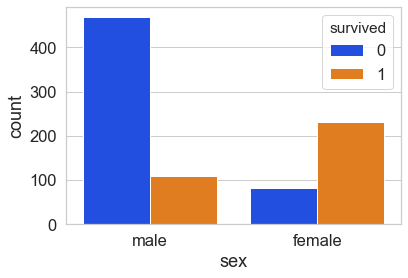

In [384]:
# What does distribution of sex look like for survival?
sns.countplot(final_df['sex'], hue= final_df['survived'], palette= 'bright');

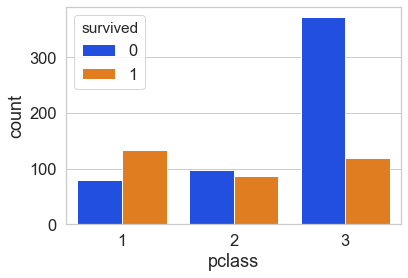

In [385]:
# What does passenger class look like in relation to survival?
sns.countplot(final_df['pclass'], hue= final_df['survived'], palette= 'bright');

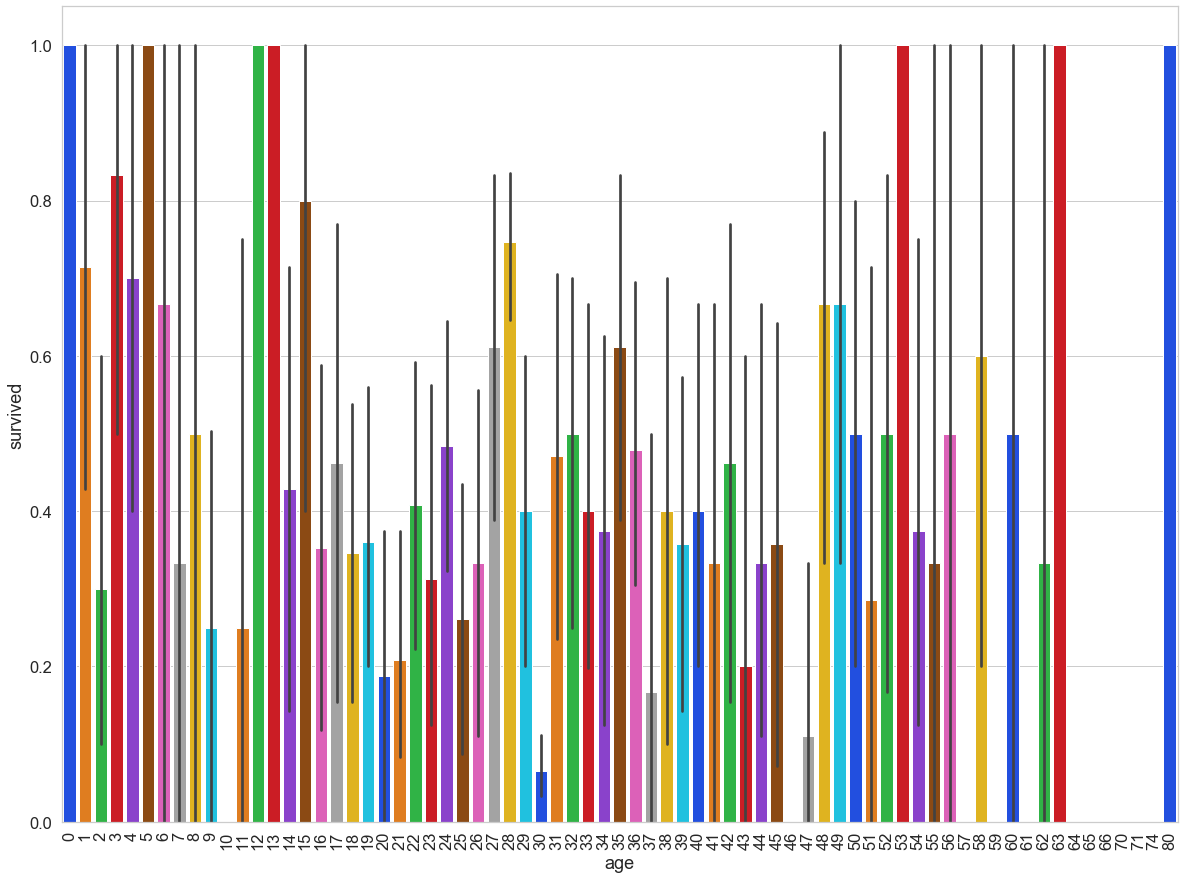

In [386]:
# What do age and survival look like?
plt.figure(figsize= (20,15))
sns.barplot(x= final_df['age'], y= final_df['survived'], palette= 'bright');
plt.xticks(rotation = 90);

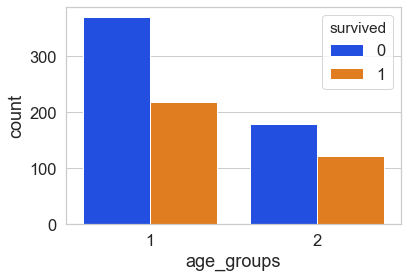

In [388]:
# Sub qustion: What do age groups and survival look like?
sns.countplot(final_df['age_groups'], hue= final_df['survived'], palette= 'bright');

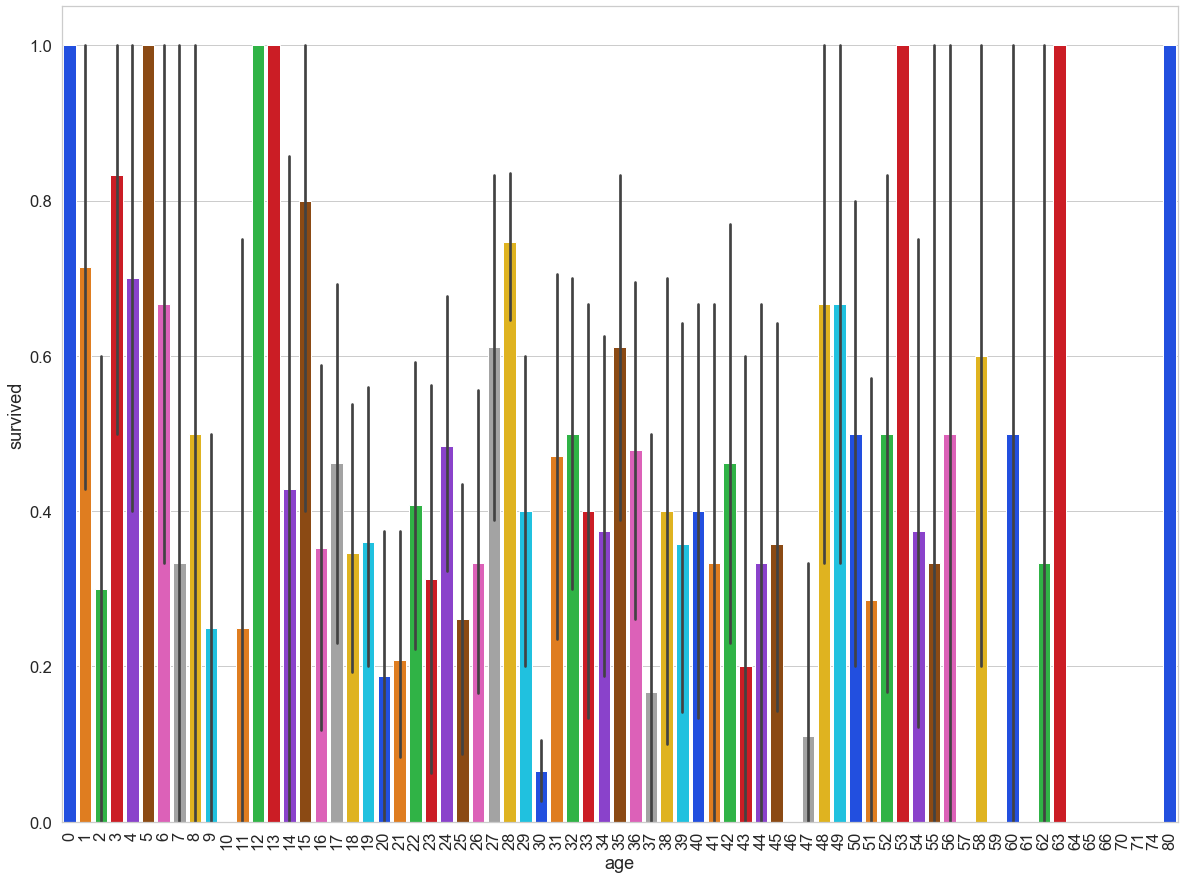

In [389]:
# What do fare and survival look like? 
plt.figure(figsize= (20,15))
sns.barplot(x= final_df['age'], y= final_df['survived'], palette= 'bright');
plt.xticks(rotation = 90);

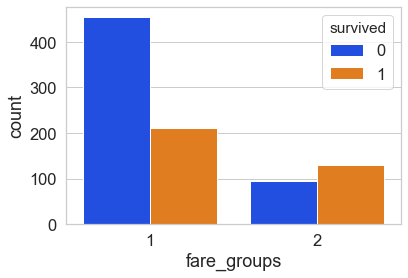

In [390]:
# What do fare groups and survival look like?
sns.countplot(final_df['fare_groups'], hue= final_df['survived'], palette= 'bright');

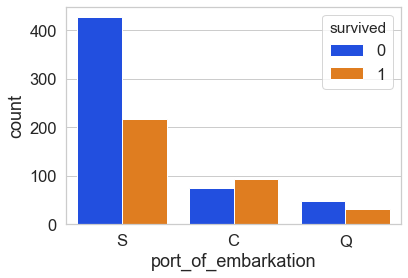

In [391]:
# What does the port of embarkation look like in comparison to survival?
sns.countplot(final_df['port_of_embarkation'], hue= final_df['survived'], palette= 'bright');

There is a lot of information above to unpack, but all of these insights would be super helpful to consider before making our model!

## 11. Relationships in Your Data
[Return to Outline](#Project-Outline:)

There are multiple ways to look at relationships across more than two features in our dataset, but for time purposes let's focus on my favorite: the correlation matrix!

In [393]:
# Let's set up the numerical part of our correlation matrix
final_corr = final_df.corr()
final_corr

,survived,pclass,age,fare,age_groups,fare_groups,sex_female,sex_male,port_of_embarkation_C,port_of_embarkation_Q,port_of_embarkation_S
survived,1.000000,-0.335549,-0.086926,0.255447,0.033660,0.233399,0.541585,-0.541585,0.169966,0.004536,-0.151777
pclass,-0.335549,1.000000,-0.327081,-0.549232,-0.329916,-0.586271,-0.127741,0.127741,-0.245733,0.220558,0.076466
age,-0.086926,-0.327081,1.000000,0.088501,0.736968,0.084897,-0.095915,0.095915,0.031771,-0.020554,-0.014899
fare,0.255447,-0.549232,0.088501,1.000000,0.147904,0.650969,0.179934,-0.179934,0.270575,-0.117785,-0.162928
age_groups,0.033660,-0.329916,0.736968,0.147904,1.000000,0.145285,-0.028079,0.028079,-0.005355,-0.127363,0.084867
fare_groups,0.233399,-0.586271,0.084897,0.650969,0.145285,1.000000,0.172548,-0.172548,0.224416,-0.159739,-0.096075
sex_female,0.541585,-0.127741,-0.095915,0.179934,-0.028079,0.172548,1.000000,-1.000000,0.084520,0.075217,-0.121405
sex_male,-0.541585,0.127741,0.095915,-0.179934,0.028079,-0.172548,-1.000000,1.000000,-0.084520,-0.075217,0.121405
port_of_embarkation_C,0.169966,-0.245733,0.031771,0.270575,-0.005355,0.224416,0.084520,-0.084520,1.000000,-0.148646,-0.782613
port_of_embarkation_Q,0.004536,0.220558,-0.020554,-0.117785,-0.127363,-0.159739,0.075217,-0.075217,-0.148646,1.000000,-0.499261


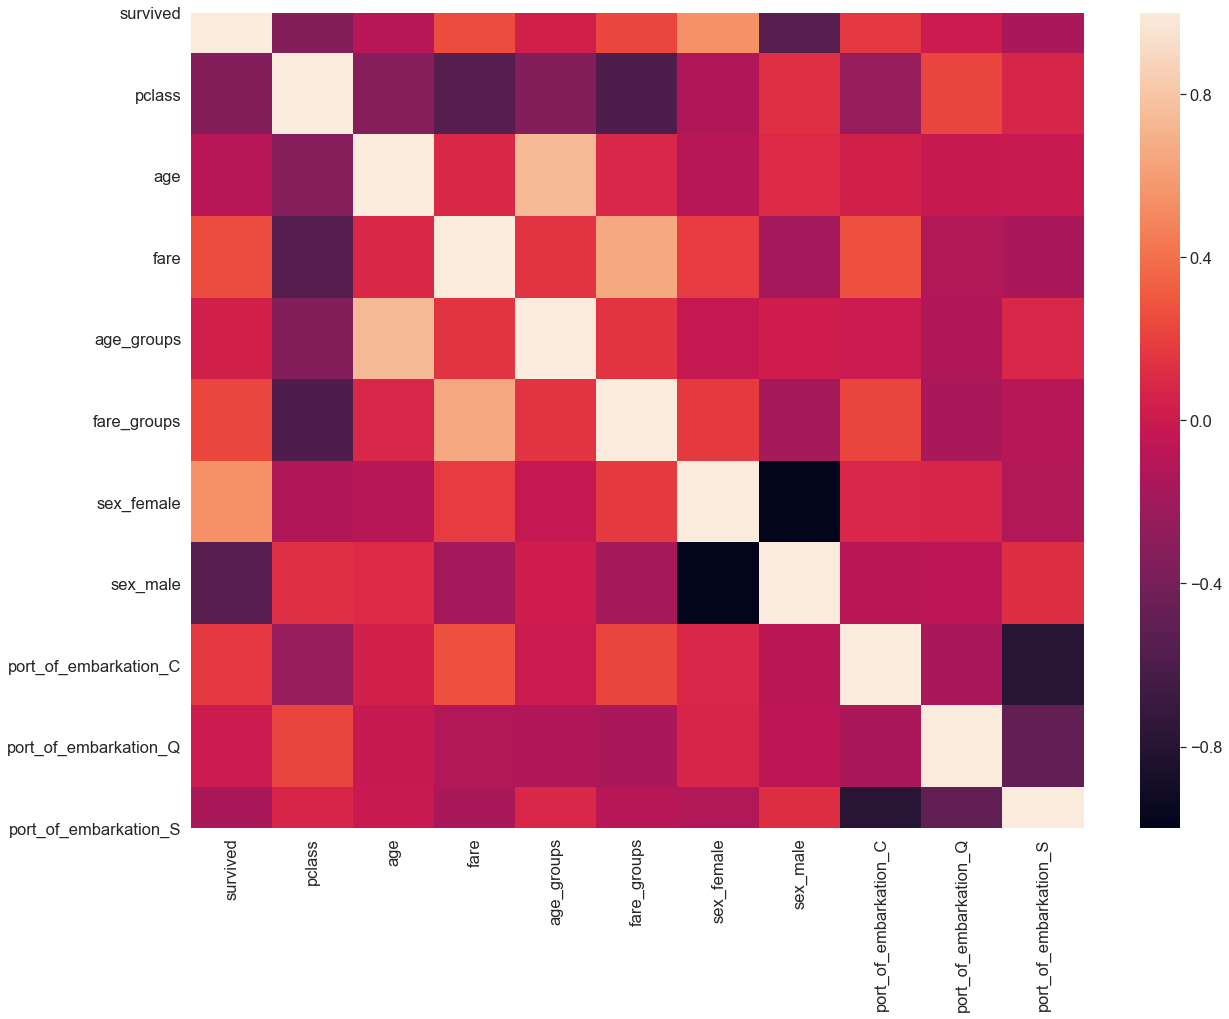

In [395]:
# What does this look like, visually?
plt.figure(figsize= (20,15))
sns.heatmap(final_corr)

What does this image really tell us? A correlation is how strongly one feature relates to another feature. We can have positive correlations (when one feature increases so does another) or negative correlations (when one feature increase another decreases). Since we mostly care about survival and how other features relate to it we can focus on just the "survived" column.

For the image above we want to focus on th features that have either a really light or really dark color in the "survived" because those most closely correlate with our target outcome! We will discuss more in person on why this info is helpful!


[Return to Outline](#Project-Outline:)